In [1]:
from dsd import DATA_DIR 
from dsd.sam_similarity_diffusion_rendered import calculate_similarities_for_renders, load_sam_model
sam_predictor = load_sam_model()

render_dataset = DATA_DIR / "diffusion_renders" / "mugs" / "small"
similarity_dict = calculate_similarities_for_renders(render_dataset, sam_predictor)


skipping /fast_storage_2/symlinked_homes/tlips/Documents/Documents/diffusing-synthetic-data/data/diffusion_renders/mugs/small/Threshold_porcelain_Coffee_Mug_All_over_bead/000/ControlnetfromHEDRenderer/a mug_0.png because it is all black
skipping /fast_storage_2/symlinked_homes/tlips/Documents/Documents/diffusing-synthetic-data/data/diffusion_renders/mugs/small/Threshold_porcelain_Coffee_Mug_All_over_bead/001/ControlNetFromCannyRenderer/a mug_1.png because it is all black
skipping /fast_storage_2/symlinked_homes/tlips/Documents/Documents/diffusing-synthetic-data/data/diffusion_renders/mugs/small/ACE_Coffee_Mug_Kristen/000/ControlnetfromHEDRenderer/a mug_1.png because it is all black
skipping /fast_storage_2/symlinked_homes/tlips/Documents/Documents/diffusing-synthetic-data/data/diffusion_renders/mugs/small/ACE_Coffee_Mug_Kristen/000/ControlNetFromDepthRenderer/a mug_1.png because it is all black
skipping /fast_storage_2/symlinked_homes/tlips/Documents/Documents/diffusing-synthetic-data/

In [16]:
import pandas
# create empty dataframe
# set columns to 'diffusion_renderer', 'prompt' ,'sam_similarity'


df_list = []
for key, value in similarity_dict.items():
    key = key.split(".")[0]
    prompt = key.split("/")[-1].split("_")[0]
    renderer = key.split("/")[-2]

    # add entry to dataframe
    df_list.append([renderer, prompt, value])

df = pandas.DataFrame(df_list, columns=['diffusion_renderer', 'prompt' ,'sam_mask_IoU'])

In [17]:
df

,diffusion_renderer,prompt,sam_mask_IoU
0,ControlnetfromHEDRenderer,a mug,0.923662
1,ControlNetFromNormalsRenderer,a mug,0.873168
2,ControlNetFromNormalsRenderer,a mug,0.880323
3,ControlNetFromDepthRenderer,a mug,0.878245
4,ControlNetFromDepthRenderer,a mug,0.877638
5,ControlNetFromCannyRenderer,a mug,0.902153
6,ControlNetFromCannyRenderer,a mug,0.906404
7,ControlnetfromHEDRenderer,a mug,0.977898
8,ControlnetfromHEDRenderer,a mug,0.940499
9,ControlNetFromNormalsRenderer,a mug,0.971950


/tmp/ipykernel_3734532/4216782094.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


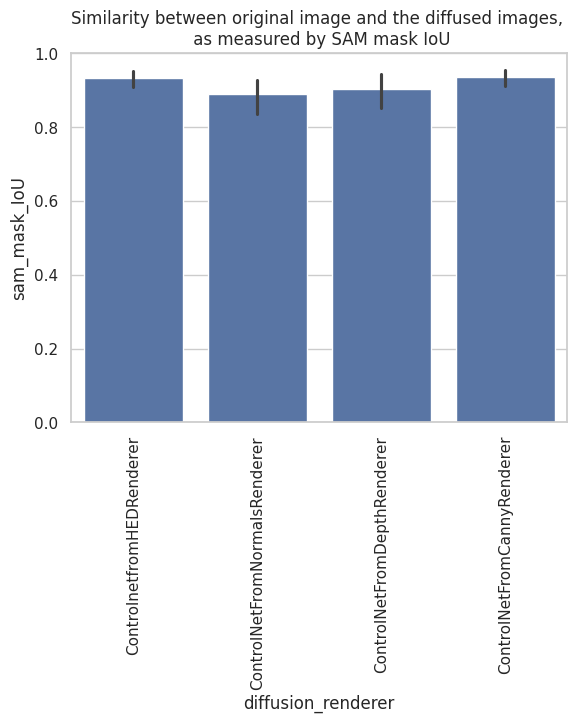

In [20]:
# plot the sam similarity for each renderer
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="diffusion_renderer", y="sam_mask_IoU", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Similarity between original image and the diffused images, \n as measured by SAM mask IoU")
plt.show()

/tmp/ipykernel_3734532/3110423882.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())


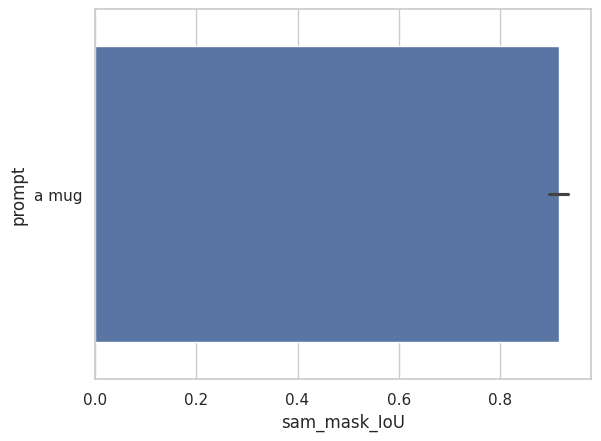

In [21]:
ax = sns.barplot(x="sam_mask_IoU", y="prompt", data=df)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()